# Vectors

A vector is an essential concept in mathematics and physics. It's like an arrow with a specific length (magnitude) and direction. Imagine a straight arrow in space. That arrow is a vector.

Components of a Vector:

Magnitude: This is just a fancy word for the vector's length or size. Imagine measuring the length of the arrow from its tail to its tip.

Direction: Think of this as the way the arrow points. Does it go up, down, left, right, or at some angle?

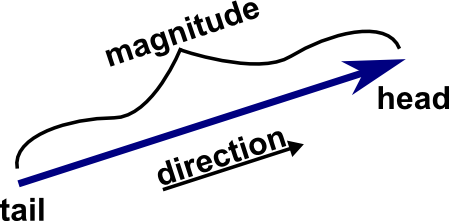

Vector Notation:
Mathematically, we write vectors like this: v = (x, y) for 2-d.

For 3-D, v = (x, y, z),

For N-D, v = (x, y, z, a,....)

In [ ]:
positionA = [1,2]
positionB = [3,4]
velocity = [2, 4, 5]


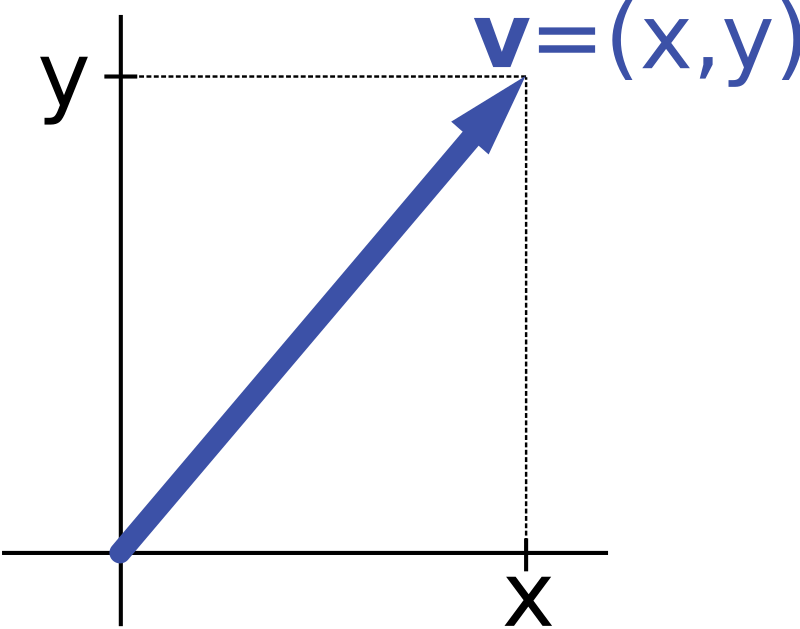

In most standard vector representations, the tail of the vector is considered as the origin (0, 0). This means that the coordinates of the vector's endpoint are relative to the origin.


The coordinate (2, 3) in coordinate system is represented as:

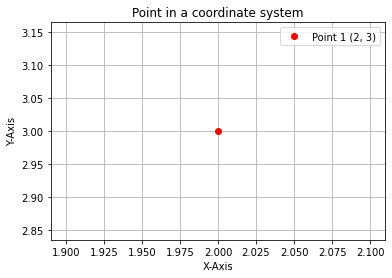

The above point (2, 3) in vector space will be represented by movement from origin. It means you move 2 units to the right (along the x-axis) and 3 units up (along the y-axis) from the origin (0, 0).


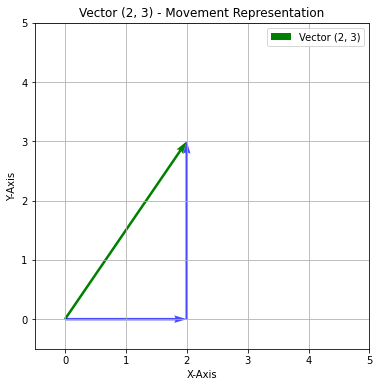

# Word Embedding 

Word embeddings are a way to represent words as vectors in a multi-dimensional space, typically in high-dimensional numerical form. These vectors capture semantic and syntactic information about words, allowing us to perform various natural language processing (NLP) tasks, such as text classification, sentiment analysis, machine translation, and more. 

king = [0.1 0.05 0.2 .... 150 such number] 

You can perform vector operations on word embeddings. 

king - men + women = queen


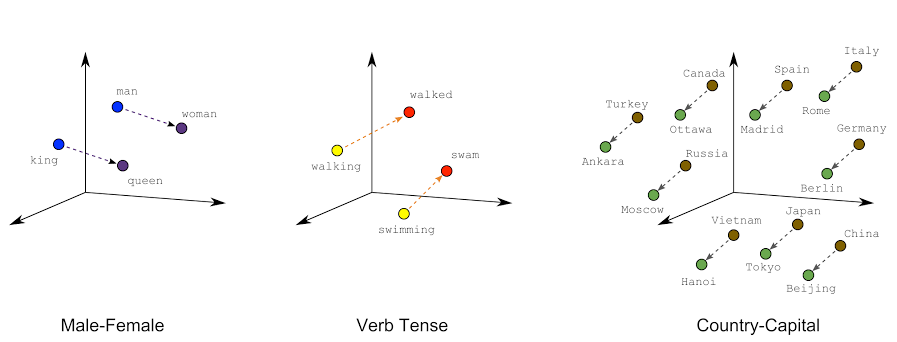

In [4]:
#Loading OpenAI key

with open("../openai_key", "r") as file:
    openai_key = file.read()

In [5]:
res["data"][0]["embedding"]

NameError: name 'res' is not defined

In [6]:
import os
os.environ["OPENAI_KEY"] = openai_key

#Getting embedding from command line

!curl https://api.openai.com/v1/embeddings \
  -H "Content-Type: application/json" \
  -H "Authorization: Bearer $OPENAI_KEY" \
  -d '{    "input": "This product is really good",    "model": "text-embedding-ada-002"}'

{
  "object": "list",
  "data": [
    {
      "object": "embedding",
      "index": 0,
      "embedding": [
        0.0065091173,
        0.0122638345,
        -0.012341209,
        -0.026462028,
        -0.010593838,
        0.0026420117,
        -0.013256805,
        -0.039203003,
        0.0012879606,
        -0.02968596,
        0.009400983,
        0.017422125,
        -0.02808689,
        -0.0063027856,
        -0.011502987,
        0.0027516254,
        0.033038847,
        0.003144945,
        -0.004884256,
        -0.003659162,
        -0.004268485,
        0.009388087,
        0.0027000424,
        -0.02009154,
        -0.007466625,
        -0.0026549073,
        0.009039903,
        -0.022348292,
        0.005106707,
        0.013011786,
        0.011077427,
        -0.0007338473,
        -0.022606205,
        -0.019498337,
        -0.009684689,
        0.007363459,
        -0.03125924,
        -0.019717563,
        0.013772634,
        0.011380477,
        0.008730406,
    

        -0.009626659,
        -0.0028338355,
        0.016261509,
        -0.0031481688,
        -0.0021697057,
        -0.008072724,
        0.00094541785,
        -0.012399239,
        0.0027967603,
        0.002577533,
        -0.0012508853,
        -0.0346895,
        -0.0011984964,
        -0.016906295,
        -0.0256367,
        0.0007322354,
        -0.034560543,
        0.008343534,
        0.0041556475,
        0.00049850036,
        -0.021419799,
        0.0025469058,
        -0.020839492,
        -0.0023325142,
        -0.02720998,
        0.013160087,
        0.0031965277,
        -0.01709973,
        -0.020646056,
        0.025288517,
        0.022361187,
        -0.019369379,
        -0.0048520165,
        -0.00015928235,
        0.01040685,
        0.008833571,
        -0.015642514,
        0.008827124,
        -0.006144813,
        -0.005812748,
        0.017125523,
        0.006418847,
        -0.0119930245,
        0.009278474,
        -0.006048095,
        0.0197820

In [7]:
import numpy as np
import urllib.request
import json
import math

# Define the endpoint URL
url = 'https://api.openai.com/v1/embeddings'

# Create a function to make the API request
def get_openai_embedding(prompt):
    headers = {
        'Authorization': f'Bearer {openai_key}',
        'Content-Type': 'application/json',
    }
    data = {
        "input": prompt,    
        "model": "text-embedding-ada-002"
    }
    
    # Encode the data and make the POST request
    data = json.dumps(data).encode('utf-8')
    req = urllib.request.Request(url, data=data, headers=headers, method='POST')
    
    try:
        response = urllib.request.urlopen(req)
        response_data = json.loads(response.read().decode('utf-8'))
        return np.array(response_data['data'][0]['embedding'])
    except urllib.error.HTTPError as e:
        print(f"HTTP Error: {e}")
        return None



In [8]:
embedding = get_openai_embedding("How are you")
embedding

array([-0.01606987, -0.00278242, -0.0047214 , ...,  0.00312487,
        0.01306391, -0.00129133])

# Visualizing words

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [10]:
from sklearn.decomposition import PCA

def visualize_pca_2d(embeddings, words):
    pca_2d = PCA(n_components=2)
    embeddings_2d = pca_2d.fit_transform(embeddings)

    # Create a 2D scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], marker='o')
    for i, word in enumerate(words):
        plt.annotate(word, (embeddings_2d[i, 0], embeddings_2d[i, 1]))

    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.title("2D Visualization of Word Embeddings")
    plt.grid(True)
    plt.show()

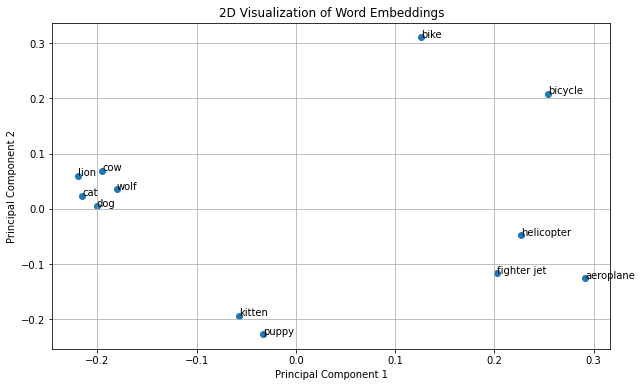

In [11]:
words = ['cat', 'dog', 'bike', 'kitten', 'puppy', 'bicycle', 'aeroplane', 'helicopter', 'cow', 'wolf', 'lion', 'fighter jet']
embeddings = []
for i in words:
    embeddings.append(get_openai_embedding(i))
visualize_pca_2d(embeddings, words)

/usr/local/anaconda/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 2349 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/anaconda/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 2366 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/anaconda/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 2352 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/anaconda/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 2340 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/anaconda/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 2350 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/anaconda/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: G

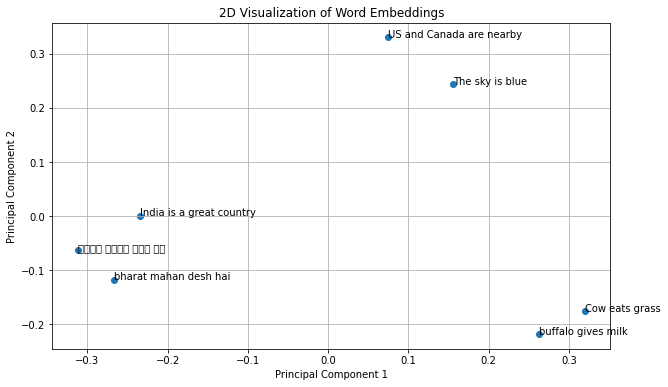

In [12]:
sentences = ['bharat mahan desh hai', 'भारत महान देश है', 'India is a great country', 'The sky is blue', 'US and Canada are nearby', 'Cow eats grass', 'buffalo gives milk']
embeddings = []
for i in sentences:
    embeddings.append(get_openai_embedding(i))
visualize_pca_2d(embeddings, sentences)

# Pythagorean Theorem

In a right-angled triangle, the square of the length of the hypotenuse (the side opposite the right angle) is equal to the sum of the squares of the lengths of the other two sides.

In mathematical terms, if we have a right-angled triangle with sides of lengths 'a' and 'b' and a hypotenuse of length 'c', the Pythagorean Theorem can be expressed as: ${c^2 = a^2 + b^2}$

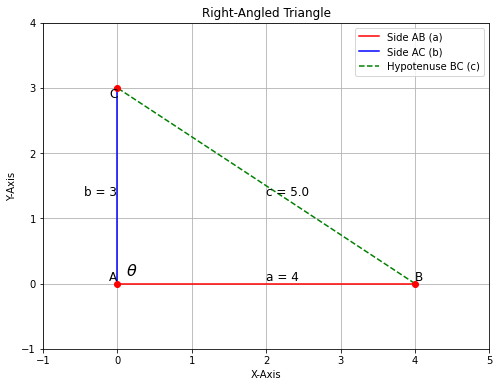

${c^2 = a^2 + b^2}$

${5^2 = 4^2 + 3^2}$

25 = 16 + 9

25 = 25

## Let's extend the theorem to calculating distance between any two points in 2 dimension:

### Step 1: Two Points - Define the Points
Imagine two points in a 2-D space. These points can represent anything from physical locations to abstract quantities.

In [13]:
point1 = (1, 2)
point2 = (4, 6)

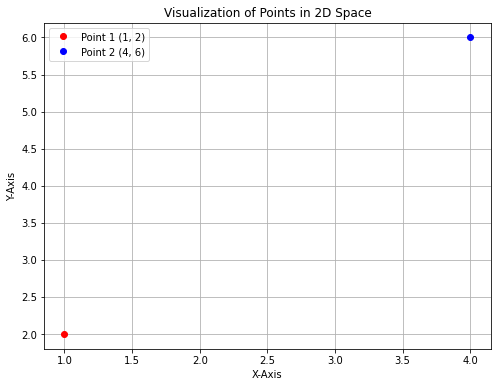

### Step 2: Connecting a Line - Calculate Differences and Hypotenuse
To measure the distance between these points, connect them with a straight line. This line represents the shortest path between the two points, equivalent to the hypotenuse of a right-angled triangle.

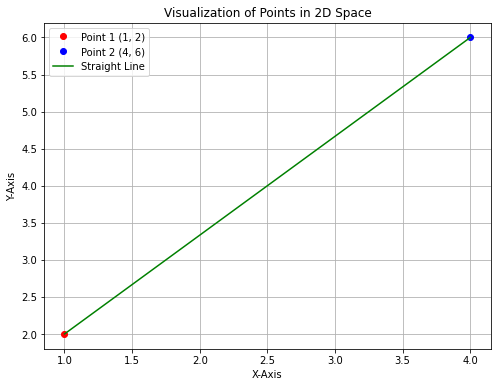

In [14]:
# Calculate the differences in coordinates
side1 = point2[0] - point1[0]
side2 = point2[1] - point1[1]
print(f"Length of side1 is {side1} units")
print(f"Length of side2 is {side2} units")

Length of side1 is 3 units
Length of side2 is 4 units


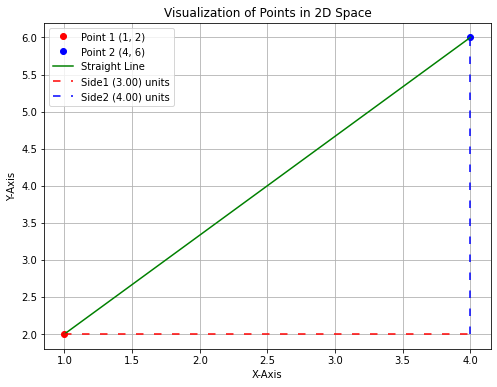

Apply pythogorean theorem to calculate length of the hypotenuse, i.e., distance between two points

In [15]:
hypotenuse_square = side1**2 + side2**2
distance_2d = math.sqrt(hypotenuse_square)
print(f"The length of the hypotenuse, i.e., distance between two points is {distance_2d} units")

The length of the hypotenuse, i.e., distance between two points is 5.0 units


So for two dimension, we can also represent the distance as:

point1 = (1, 2)

point2 = (4, 6)

distance = hypotenuse

distance = $\sqrt{hypotenuse^2}$

distance = $\sqrt{side1^2 + side2^2}$

distance = $\sqrt{(point2[0] - point1[0])^2 + (point2[1] - point1[1])^2}$


In [16]:
distance_2d = ((point2[0] - point1[0])**2 + (point2[1] - point1[1])**2)**0.5

print("Distance between 2D points:", distance_2d)

Distance between 2D points: 5.0


Now, let's represent them in terms of x and y:-

point1 = (1, 2)

point2 = (4, 6)

${x_2}$ = point2[0] = 4

${x_1}$ = point1[0] = 1

${y_2}$ = point2[1] = 6

${y_1}$ = point1[1] = 2

distance =$\sqrt{(x_2 – x_1)^2 + (y_2 – y_1)^2}$

distance =$\sqrt{(4 – 1)^2 + (6 – 2)^2}$

distance = $\sqrt{9 + 16}$

distance =$\sqrt{25}$

This is called euclidean distance. 

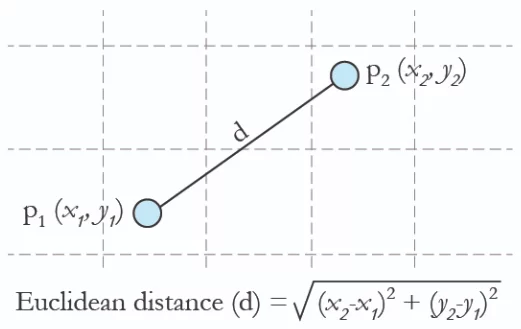

## Let's extend pythogorean theorem to 3-dimension

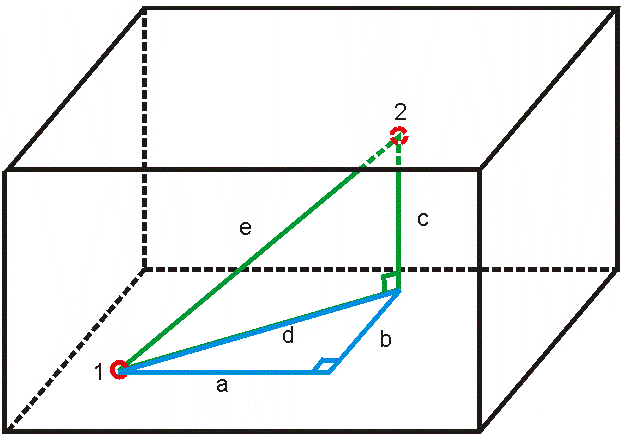

Distance 'e' would be the distance between point 1 & point 2. We could determine it using Pythagora's theorem as seen previously, but we first need to find the value of 'd' using values 'a' and 'b'.

For triangle abd

${d^2 = a^2 + b^2}$

For triangle ecd

${e^2 = d^2 + c^2}$

substituting ${d^2}$ in the above equation

${e^2 = a^2 + b^2 + c^2}$

e = $\sqrt{a^2+b^2 + c^2}$

In [17]:
# Define two 3D points
point1 = (1, 2, 3)
point2 = (4, 6, 8)

In [18]:
# Calculate the differences in coordinates
delta_x = point2[0] - point1[0]
delta_y = point2[1] - point1[1]
delta_z = point2[2] - point1[2]

distance_3d = (delta_x**2 + delta_y**2 + delta_z**2)**0.5
print("Distance between 3D points:", distance_3d)

Distance between 3D points: 7.0710678118654755


Again, we can represent the distance as:

point1 = (1, 2, 3)

point2 = (4, 6, 8)

distance = hypotenuse

distance = $\sqrt{hypotenuse^2}$

distance = $\sqrt{\Delta x^2 + \Delta y^2 + \Delta z^2}$

distance = $\sqrt{(point2[0] - point1[0])^2 + (point2[1] - point1[1])^2 + (point2[2] - point1[2])^2}$

In [19]:
distance_3d = ((point2[0] - point1[0])**2 + (point2[1] - point1[1])**2 + (point2[2] - point1[2])**2)**0.5

print("Distance between 3D points:", distance_3d)

Distance between 3D points: 7.0710678118654755


So euclidean distance for 3-D becomes as:

distance =$\sqrt{(x_2 – x_1)^2 + (y_2 – y_1)^2 + (z_2 – z_1)^2}$

## Let's extend it to n-dimension

In [20]:
def euc_dist(p1, p2):
    totalsq = 0
    for i in range(len(p1)):
        d = p2[i] - p1[i]
        totalsq += d*d
    return math.sqrt(totalsq)

In [21]:
# Calculate the Euclidean distance
def calculate_distance(point1, point2):
    distance_nd = sum((x - y) ** 2 for x, y in zip(point2, point1))**0.5
    return distance_nd

In [22]:
point1 = (1, 2, 3, 4, 7, 4)
point2 = (4, 6, 8, 10, 8, 6)
calculate_distance(point1, point2)

9.539392014169456

So, Euclidean distance for n-d becomes as

distance =$\sqrt{(x_2 – x_1)^2 + (y_2 – y_1)^2 + (z_2 – z_1)^2 + (a_2 – a_1)^2 + ............}$

where x, y, z, a ....., each represent a dimension/axis.

Or we can say that,

For two points p and q in n-dimension, 

d(p, q) =$\sqrt{(q_1 – p_1)^2 + (q_2 – p_2)^2 + (q_3 – p_3)^2 + (q_4 – p_4)^2 + ............}$

which comes as,

distance =$\sqrt{\sum_{i=1}^{n} (q_i - p_i)^2 }$

where i represents a dimension and n total number of dimensions.

## Let's use calculate_distance() to calculate distance between two embeddings

In [23]:
cat = get_openai_embedding('cat')
dog = get_openai_embedding('dog')
car = get_openai_embedding('car')
bike = get_openai_embedding('bike')

In [24]:
cat = get_openai_embedding('cat')
cat1 = get_openai_embedding('cat')

In [25]:
calculate_distance(cat, cat1)

0.0

In [26]:
len(cat)

1536

In [27]:
len(dog)

1536

In [28]:
sentence1 = get_openai_embedding('The queen of england')
sentence2 = get_openai_embedding('The queen in game of chess')
sentence3 = get_openai_embedding('The king of england')

calculate_distance(sentence1, sentence2), calculate_distance(sentence1, sentence3)

(0.46926599244629214, 0.33436551345001264)

In [29]:
# Calculate distances between embeddings
distance_cat_dog = calculate_distance(cat, dog)
distance_cat_car = calculate_distance(cat, car)
distance_cat_bike = calculate_distance(cat, bike)
distance_bike_car = calculate_distance(bike, car)
distance_bike_dog = calculate_distance(bike, dog)

# Display distances
print(f"Distance between 'cat' and 'dog': {distance_cat_dog:.2f}")
print(f"Distance between 'cat' and 'car': {distance_cat_car:.2f}")
print(f"Distance between 'cat' and 'bike': {distance_cat_bike:.2f}")
print(f"Distance between 'bike' and 'car': {distance_bike_car:.2f}")
print(f"Distance between 'bike' and 'dog': {distance_bike_dog:.2f}")

# Compare distances
if distance_cat_dog < distance_cat_car and distance_cat_dog < distance_cat_bike:
    print("'cat' is closer to 'dog' than to 'car' or 'bike'.")

if distance_bike_car < distance_bike_dog and distance_bike_car < distance_cat_bike:
    print("'bike' is closer to 'car' than to 'dog' or 'cat'.")

Distance between 'cat' and 'dog': 0.52
Distance between 'cat' and 'car': 0.56
Distance between 'cat' and 'bike': 0.61
Distance between 'bike' and 'car': 0.54
Distance between 'bike' and 'dog': 0.58
'cat' is closer to 'dog' than to 'car' or 'bike'.
'bike' is closer to 'car' than to 'dog' or 'cat'.


# Sentiment Analysis

In [30]:
embeddings_good_review = get_openai_embedding('The product is amazing')
embeddings_bad_review = get_openai_embedding('The product is not good')
embd_positive = get_openai_embedding('positive')
embd_neg = get_openai_embedding('negative')

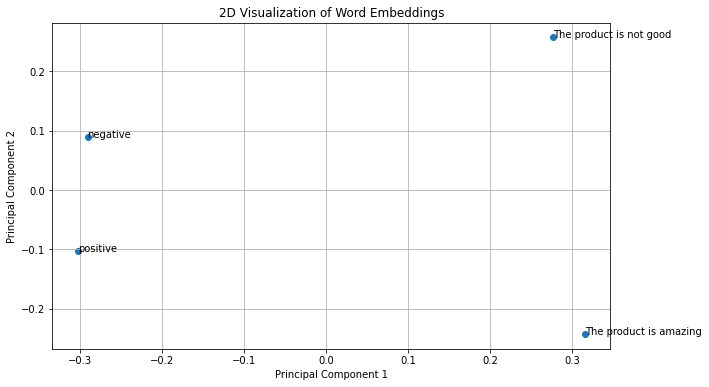

In [31]:
sent_embeddings = np.array([embeddings_good_review, embeddings_bad_review, embd_positive, embd_neg])
visualize_pca_2d(sent_embeddings, words = ['The product is amazing', 'The product is not good',
                                              'positive', 'negative'])

In [32]:
calculate_distance(embeddings_good_review, embd_positive)

0.6679850380335637

In [33]:
calculate_distance(embeddings_good_review, embd_neg)

0.698319543856834

In [34]:
calculate_distance(embeddings_bad_review, embd_positive), calculate_distance(embeddings_bad_review, embd_neg)

(0.6875927297300988, 0.6333440247603926)

In [35]:
def is_positive(review):
    embed_review = get_openai_embedding(review)
    dist_pos = calculate_distance(embed_review, embd_positive)
    dist_neg = calculate_distance(embed_review, embd_neg)
    if dist_pos < dist_neg:
        print("It is a positive review")
        return True
    else:
        print("It is a negative review")
        return False

In [36]:
is_positive("Camera quality is too worst. Don't buy this if you want good photos. We can get this quality pictures with 5000 rupees android phone. I am totally disappointed because I expected range of iPhone camera quality but not this.. Waste of money.")

It is a negative review


False

In [37]:
is_positive('''
J’ai reçu le téléviseur, fais l’installation et après 2hrs sur ma ps5, plus rien. Le téléviseur a lâché.
Très déçu du produit versus les commentaires.
Je ne recommande pas ce produit. Aller vers des marques qui ont fait leurs preuves.
Pour quelques dollars de plus vous allez vous allez avoir un produit fiable.'
''')

It is a negative review


False

In [38]:
is_positive('''
ent picture. Does 120hz 4k gaming perfectly. Instantly made my xbox x into the machine it is meant to be.
The YouTube premium and Amazon prime apps work perfectly, also in 4k. Easy set up, but having a Google account is a must as it is a Google TV...
You cannot get a better TV at this price. I researched a lot and TCL has some great reviews in gaming threads on Reddit as being not just the least expensive but the most trouble free 120hz TV, period.
And the remote is back-lit to perfection.
''')

It is a positive review


True

In [39]:
sum(embd_positive*embd_positive)

1.0000000047727824

In [27]:
sum(embd_neg*embd_neg)

1.0000000130911129

In [28]:
is_positive("Worth to buy it. If you are managed money buy then buy it it never feels you waste of money. Performance. Hand in feel. Camera quality at flagship level")

It is a positive review


True

In [29]:
is_positive("At first it seemed like a great product but my expected were changed completed.")

It is a negative review


False

In [30]:
is_positive("At first, it seemed like a bad product but it met my expectations.")

It is a positive review


True

In [47]:
is_positive('''
Amazing image quality. Easy to setup. Only issue is it runs out of ram if you open too many apps by accident, but I find a work around to this you go to manage your apps and force close them to clean the nenory. Probably an app of the playstore can do foto you too
''')

It is a positive review


True

In [48]:
is_positive('''
I checked reviews before buying this TV, but it's not that impressive, as per me it's just okay, Sound quality is nice but picture quality lacks when you tries to change channel or turn off the TV.
''')

It is a negative review


False

In [49]:
pd1 = get_openai_embedding('''
TCL 55-Inch Q7 QLED 4K Smart TV with Google TV (55Q750G-CA, 2023 Model) Dolby Vision, Dolby Atmos, HDR Ultra, 120Hz, Game Accelerator 240, Voice Remote, Works with Alexa, Streaming UHD Television
''')
pd2 = get_openai_embedding('''
LG 55-Inch C4 OLED evo 4K Smart TV - α9 AI Processor 4K, Alexa Built-in, 144Hz Refresh Rate, HDMI 2.1, G-Sync, FreeSync, VRR, WebOS 24, Dolby Vision, Dolby Atmos (OLED55C4PUA, 2024)
''')
pd3 = get_openai_embedding('''
Ibera PakRak Bicycle Touring Carrier Plus, Frame-Mounted for Heavier Top and Side Loads, Height Adjustable, Fender Board, Black
''')
calculate_distance(pd1, pd2), calculate_distance(pd1, pd3)


(0.45302571578211076, 0.7522288579846224)

# How to build web application:
    https://docs.djangoproject.com/en/5.0/
    Start Tutorial here: https://docs.djangoproject.com/en/5.0/intro/tutorial01/
    
Django vs Flask
If you are build a whole website, GO for Django.


If you are just looking launch a small service: Flask


# Mobile App

Native App. 
- iPhone
    - UI: React, Flutter or Angular..
- Android
Web App
- Computer Browser
- Mobile Browser
======
HYbrid:
    - Android App -> WebView -> Load URL
    - Iphone App -> Webview -> Load URL
--
Our Primary FOcus was: Mobile WEB
    

#Flow

User's request -> Nginx or Apache --> Django Server

See https://norvig.com/21-days.html

In [3]:
# Build you own app

# Contribute to Open Source

# Usecase of Embeddings:
1. Sentiment Analysis - "negative" <> review <> "positive"
2. Matching Similar Products in e-Commerse Company
3. Matrimony - 
    3.1 One perons's wish list <> Other's person' bio or about me. 
    3.2 One person Profile <> other person profile
4. Job Search - 
    Person's CV <> Job Description
5. Linked Profile Search , Profile Search
6. Documents Search: embedding of user's query <> embedding of all the documents:
    O(n)
    TODO: Can be made faster a vector datastore. O(log(n))
        
7. Train a model to classify documents into various buckets

8. Chat Bot. First look up closest documents as #6. Then ask LLM to compose an answer using the document. "RAG"

9. 

In [40]:
# Q: Can we build a calculator

exp = get_openai_embedding("(10.4 * 56 - 12)/4")
ans = get_openai_embedding("142.6")
ans1 = get_openai_embedding("150.1")
ans2 = get_openai_embedding("140.4")
ans3 = get_openai_embedding("0")


In [41]:
calculate_distance(exp, ans)

0.6400687043507265

In [42]:
calculate_distance(exp, ans1)

0.6710100144216112

In [43]:
calculate_distance(exp, ans2)

0.6237903090347398

In [44]:
calculate_distance(exp, ans3)

0.6685092261357892

In [45]:
def lenth_v(vector):
    total = 0
    for v in vector:
        total += v*v
    return math.sqrt(total)

In [46]:
lenth_v(exp)

1.0000000511963891

In [47]:
lenth_v(ans), lenth_v(ans1), lenth_v(ans2)

(1.0000000372515059, 1.0000000306389416, 1.0000000568308767)

In [53]:
len(ans)

1536

In [50]:
def cosine_similarity(v1, v2):
    similarity = 0
    for i in range(len(v1)):
        similarity += v1[i]*v2[i]
    return similarity

In [ ]:
def eucl(v1, v2):
    sqdist = 0
    for i in range(len(v1)):
        d = v1[i] - v2[i]
        sqdist += d*d
    return sqdist

In [52]:
for i, a in enumerate([ans, ans1, ans2, ans3]):
    print(i, cosine_similarity(exp, a))

0 0.795156115303287
1 0.7748728621082883
2 0.8054429332044426
3 0.7765477851898384


## Dot product between two vectors

The dot product, also known as the scalar product, is a mathematical operation between two vectors. Given two vectors A and B in a multi-dimensional space, the dot product is calculated by multiplying their corresponding components and then summing up those products. Mathematically, the dot product of two vectors A and B is represented as A · B and is calculated as follows:

A = (A1, A2, A3, ......, An)

B = (B1, B2, B3, ......, Bn

A · B = A1 * B1 + A2 * B2 + A3 * B3 + ... + An * Bn

So suppose two vectors are

A = (1,2,3)

B = (4,5,6)

A.B = (A[0] * B[0]) + (A[1] * B[1]) + (A[2] * B[2])

A.B = (1 * 4) + (2 * 5) + (3 * 6)

A.B = 32

In [54]:
import numpy as np
a = np.array([1,2,3])
b = np.array([4, 5, 6])
np.dot(a, b)

32

### What the Dot Product Represents?

The dot product represents the similarity or alignment between those vectors. It provides a way to quantify how much two vectors point in the same direction, and it's often used to determine the similarity or dissimilarity between vectors in various contexts.

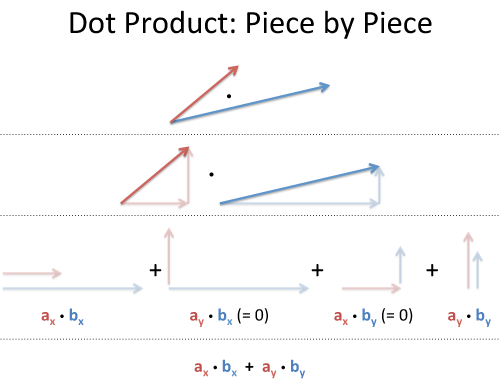

In [31]:
np.dot([0, 1], [1,0])

0

In [55]:
def is_positive2(review):
    embed_review = get_openai_embedding(review)
    similarity_pos = np.dot(embed_review, embd_positive)
    similarity_neg = np.dot(embed_review, embd_neg)
    if similarity_pos > similarity_neg:
        print("It is a positive review")
        return True
    else:
        print("It is a negative review")
        return False

In [56]:
is_positive2("ye product kaafi achha hai")

It is a positive review


True

In [57]:
is_positive2("ye product kaafi kharaab hai")

It is a negative review


False

Now let's visualize both vectors and their dot product projection

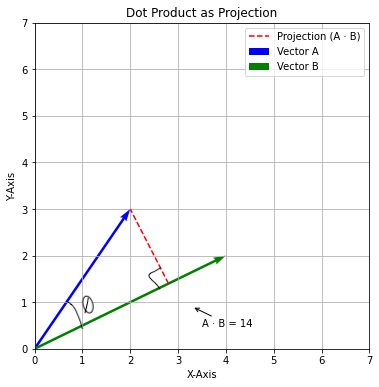

Now, we know that cos(θ) = adjacent side / hypotenuse

In the context of the dot product, the adjacent side is (A · B), and the hypotenuse is (|A| * |B|). Therefore, we have:

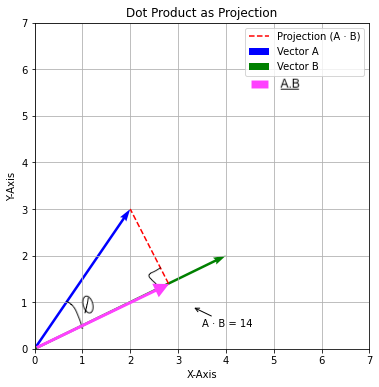

That makes cos θ = (A · B) / (|A| * |B|)

This is called as cosine similarity

If the vectors are exactly the same, the cosine similarity is 1 (cos 0° = 1).

If the vectors are orthogonal (perpendicular), the cosine similarity is 0 (cos 90° = 0).

If the vectors are in opposite directions, the cosine similarity is -1 (cos 180° = -1).

Values in between indicate different degrees of similarity.

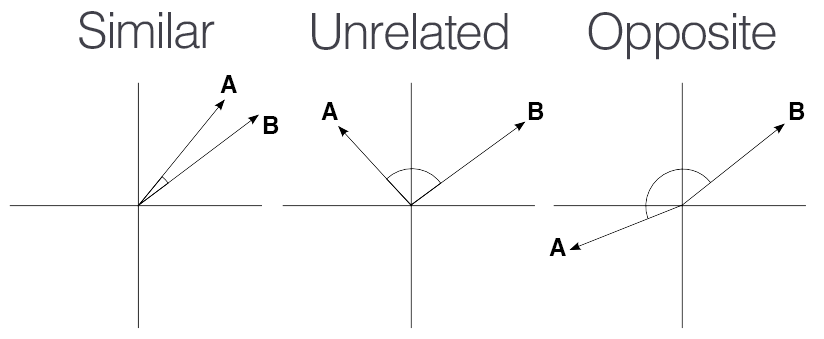

In [35]:
def cosine_similarity(A, B):
    dot_product = np.dot(A, B)

    # Calculate the magnitudes |A| and |B|
    magnitude_A = np.linalg.norm(A)
    magnitude_B = np.linalg.norm(B)

    # Calculate the cosine similarity
    cosine_similarity = dot_product / (magnitude_A * magnitude_B)
    return cosine_similarity

In [36]:
def is_positive3(review):
    embed_review = get_openai_embedding(review)
    dist_pos = cosine_similarity(embed_review, embd_positive)
    dist_neg = cosine_similarity(embed_review, embd_neg)
    if dist_pos > dist_neg:
        print("It is a positive review")
        return True
    else:
        print("It is a negative review")
        return False

In [37]:
is_positive3("Useful product")

It is a positive review


True

In [38]:
is_positive3("Useless product")

It is a negative review


False

## Comparison of similarity metrics

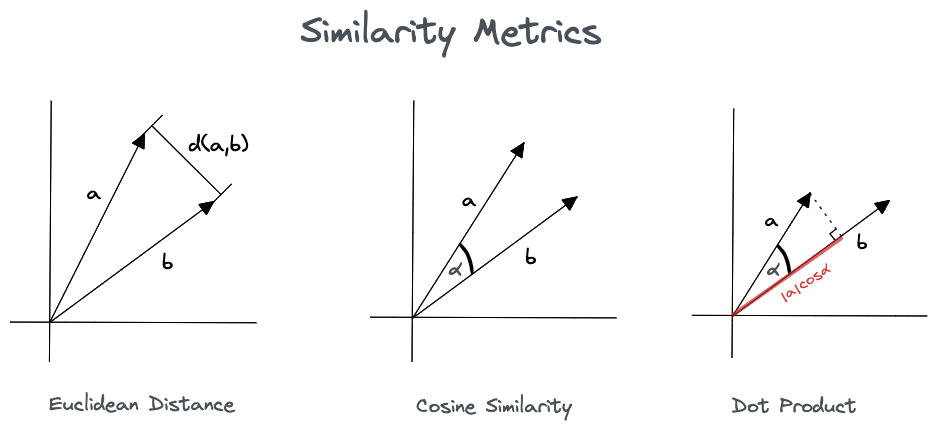

In [58]:
# Cross Entropy
# Bleu
# 